# (Dataset Exploration Title)
## by (Sarah Ahmed Ahmed)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [10]:
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [12]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [14]:
df["duration_min"]=df["duration_sec"]/60

In [15]:
df.drop("duration_sec",axis=1,inplace=True)

In [16]:
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667


In [17]:
df["user_type"].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### What is the structure of your dataset?

> we can devide our data into 3 main hadlines :
> 1- trip duration : the features thar show this information are : start_time, end_time, duration_sec which i transformed it into duration_min to be more easily to understand. 
> 2- start and end locations : the features that show this information are start_station_id, start_station_name,end_station_id,	end_station_name	  
> 3- the drivers information: the features that show this information are :bike_id	user_type	member_birth_year	member_gender, bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

> the duration time and it's relation with the driver's information ( age, gender, type(subscriber or customer)) will be my main interest during this expoloration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, end_time, duration_sec, user_type, member_birth_year, member_gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [18]:
df['user_age'] = 2020 - df['member_birth_year']


In [19]:
df["user_age"].isnull().sum()

8265

In [20]:
df["user_age"].fillna(df["user_age"].mean(),inplace=True)

In [21]:
df["user_age"].head()

0    36.000000
1    35.193563
2    48.000000
3    31.000000
4    46.000000
Name: user_age, dtype: float64

In [22]:
df.describe()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,user_age
count,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000
mean,37.771223,-122.352664,37.771427,-122.352250,1984.806437,12.101307,35.193563
std,0.099581,0.117097,0.099490,0.116673,10.116689,29.906496,9.886118
min,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,19.000000
25%,37.770083,-122.412408,37.770407,-122.411726,1980.000000,5.416667,28.000000
50%,37.780760,-122.398285,37.781010,-122.398279,1987.000000,8.566667,33.000000
75%,37.797280,-122.286533,37.797320,-122.288045,1992.000000,13.266667,39.000000
max,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1424.066667,142.000000


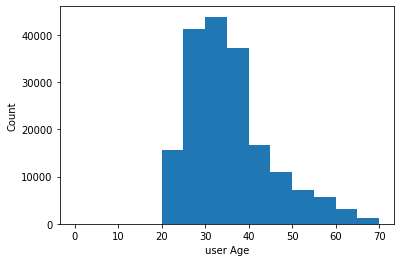

In [25]:

bins = np.arange(0, df['user_age'].max()+5, 5)
plt.hist(df['user_age'], bins=bins);
plt.xlabel('user Age');
plt.ylabel('Count');

In [26]:
#remove the unlogic ages
df = df.query('user_age <= 70')
df['user_age'] = df['user_age'].astype('int')

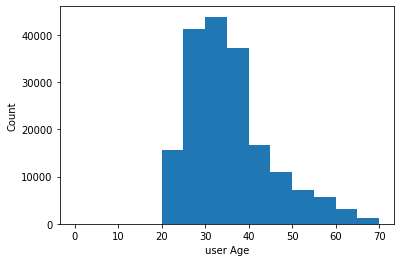

In [27]:

bins = np.arange(0, df['user_age'].max()+5, 5)
plt.hist(df['user_age'], bins=bins);
plt.xlabel('user Age');
plt.ylabel('Count');

### When are most trips taken in terms of time of day and day of the week?

In [28]:
df['start_date'] = df["start_time"].dt.strftime('%Y-%m-%d')
df['start_date']

0         2019-02-28
1         2019-02-28
2         2019-02-28
3         2019-02-28
4         2019-02-28
             ...    
183407    2019-02-01
183408    2019-02-01
183409    2019-02-01
183410    2019-02-01
183411    2019-02-01
Name: start_date, Length: 182738, dtype: object

In [29]:
df['starting_hour'] = df["start_time"].dt.strftime('%H')
df['starting_day'] = df["start_time"].dt.strftime('%A')


In [30]:
df["starting_hour"]

0         17
1         18
2         12
3         17
4         23
          ..
183407    00
183408    00
183409    00
183410    00
183411    00
Name: starting_hour, Length: 182738, dtype: object

Text(0, 0.5, 'Count')

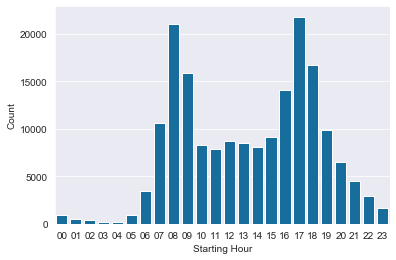

In [31]:
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df, x='starting_hour', color=base_color);
plt.xlabel('Starting Hour');
plt.ylabel('Count')

### it' obivious that the peak of the starting hours are from [ 9 to 8 am] and from [17 to 18 pm]

Text(0, 0.5, 'Count')

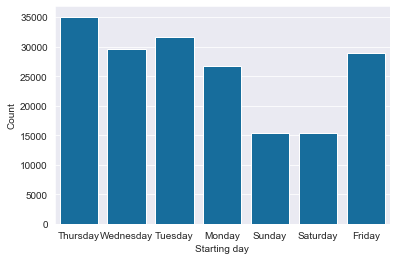

In [32]:
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df, x='starting_day', color=base_color);
plt.xlabel('Starting day');
plt.ylabel('Count')

### as the above chart shows that Thursday is the most day that trips taken place in it

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

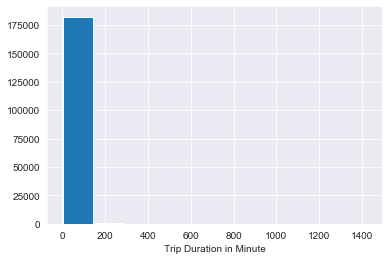

In [33]:
plt.hist(data=df, x='duration_min');
plt.xlabel('Trip Duration in Minute');

### How long does the average trip take?

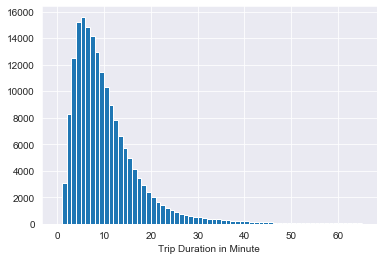

In [34]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 10)
plt.hist(data=df, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

### it's shown that the maximum duration that the users get to is from [5 to 10] minutes and no one exceeds the 50 minutes

#### Who are our users ?

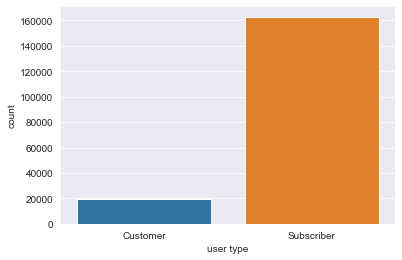

In [35]:
sb.countplot(data=df, x='user_type');
plt.xlabel('user type');

#### it's shown that the users are subscribers and customers and the  no. of subscribers is much higher than the no. of customers

####  What is their gender ? 


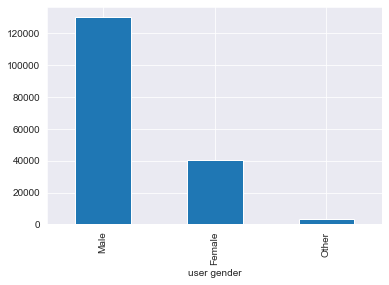

In [37]:
df.member_gender.value_counts().plot(kind = 'bar')
plt.xlabel('user gender');
plt.show()

#### it's obivious that the no of males exceeds the no of females by approxiamtely 80 k  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes i have discovered that there are some user_ages are above 120 so it's not logic that someone is alive more than 100 years and driving a bike so i removed these outliters and removed anyone more than 70 years 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes i have changed the timestamp of the start time to be eadily used and extract the starting hours and days from it. i also found that there is above than 8000 user have missing ages so i replace it with the mean of the ages. also i needed to change the data type of many features and adding new features such as the duration in minutes, starting hour and starting day of the week to help me in the analysis i want to perform

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Does the trip duration depend on if a user is a subscriber or customer?

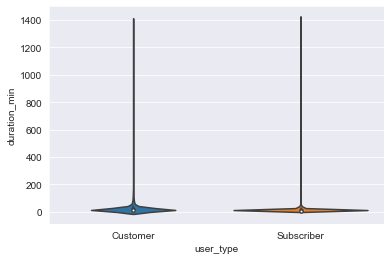

In [38]:
sb.violinplot(x="user_type",y="duration_min",data=df)

#### I need to remove the outliters duration minutes since that the maximum duration that the users get to is from [5 to 10] minutes and no one exceeds the 50 minutes¶


In [39]:
df = df.query('duration_min <= 55')

Text(0, 0.5, 'Trip Duration in Minute')

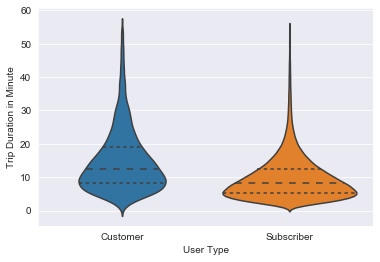

In [40]:
sb.violinplot(x="user_type",y="duration_min",data=df, inner='quartile')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute')

In [41]:
df["user_type"].value_counts(normalize=True)

Subscriber    0.896517
Customer      0.103483
Name: user_type, dtype: float64

### since it's obiviously that the proportion of the subscriber is much higher than the proportion of the customer so, the violin of the subscriber is lareger in the direction of x-axis than the customer' violin and the trip duration distribution is much narrower for subscribers compared to customers who vary more and generally rented the bikes for longer. 

#### does the trip duration related with the user gender ?

Text(0, 0.5, 'Trip Duration in Minute')

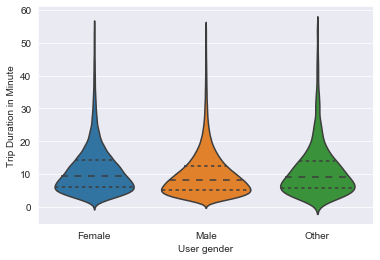

In [42]:
sb.violinplot(x="member_gender",y="duration_min",data=df, inner='quartile')
plt.xlabel('User gender');
plt.ylabel('Trip Duration in Minute')

### it's obivious that the gender has approximately no effect on the trip duration as the median of the three types is around 10 minutes

#### does the user ages is related with the trip duration ?

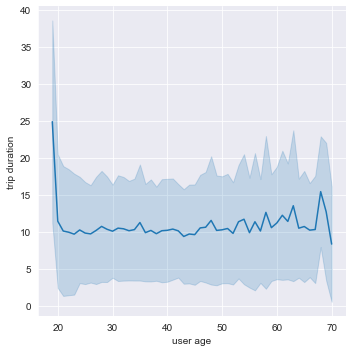

In [43]:
sb.relplot(x="user_age", y="duration_min",kind='line',ci="sd" ,data=df);
plt.xlabel('user age');
plt.ylabel('trip duration');

### so it's obivious that users who exceed 20 years have a maximum duration 25 minutes 

#### is there is a relation between the user age and the user type ?

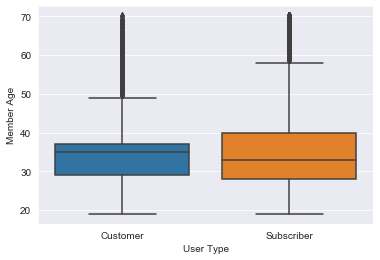

In [44]:
sb.boxplot(data=df, x='user_type', y='user_age');
plt.xlabel('User Type');
plt.ylabel('Member Age');

### so the subscribers are slightly older than the customers 

#### is there is a relation between the user age and the user gender ?

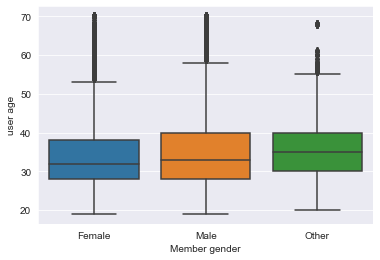

In [51]:
sb.boxplot(data=df, x='member_gender', y='user_age');
plt.xlabel('Member gender');
plt.ylabel('user age');

#### so the males are slightly older than the females 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> at first i wanted to visualize the relation between the user type and the trip duration but i found outliers so i removed the trips duration which exceed th 55 minutes then i graph it and found that customers have longer trip duration than the subscribers. also from the visualization i concluded that there is no difference between the gender with respect to the trip duration. people above 20 years don't exceed the 25 minutes  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### How does the average trip duration vary in weekdays between customers and subscribers?



Text(0, 0.5, 'Avg. Trip Duration in Minute')

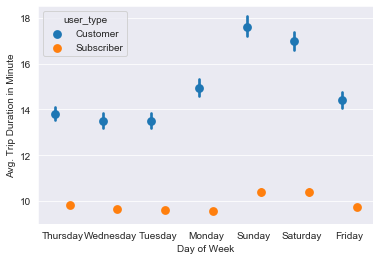

In [46]:
sb.pointplot(data=df, x='starting_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')


#### the subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends.

#### How does the user age vary in user gender between customers and subscribers?


Text(0, 0.5, 'Avg. ages')

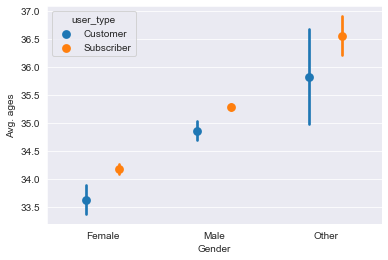

In [50]:
sb.pointplot(data=df, x='member_gender', y='user_age', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Gender');
plt.ylabel('Avg. ages')

#### it's shown that the average age of males is slightly higher than the females also it's shown that customers in general have lowr average age han subscribers

C:\Users\saara\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


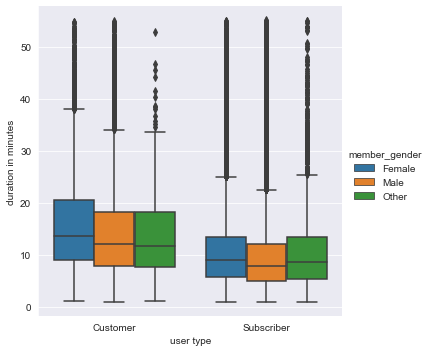

In [48]:
box= sb.factorplot(x="user_type", y="duration_min", hue="member_gender", kind="box",data=df)
box.set_xlabels('user type')
box.set_ylabels('duration in minutes')
plt.show()

### Female customers tend to travel more in duration than Male Customers in terms of the Boxplot. Infact ,and  in the Subscriber too. Another pretty important thing we can observe is Female customers tend to take more duration than Female subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> i found that the average age of males is much higher than females in this data aslo i founbd that cusomers tend to the longer trip duration than the subscribers also saturdays and sundays have the longest trips through the week.

### Were there any interesting or surprising interactions between features?

> yes the females tend th share bikes in trips more tha females

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!